Install prerequisites and import appropriate functions

In [49]:
%pip install pandas matplotlib scikit-learn
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Read input CSV from the folder and print it to confirm successful read

In [50]:
df_pm = pd.read_csv('8-3-2023  -  11-46.csv',delimiter=',',header='infer')

In [51]:
df_pm

,DateTime,Fidas 200 PM2.5,SPS30 PM2.5,SEN55 PM2.5,HPMA115 PM2.5,NextPM PM2.5,SDS011 PM2.5
0,2023-3-8 11:46:50,0.17,0,0,0,0,0.1
1,2023-3-8 11:46:56,0.17,0,0,0,0,0.5
2,2023-3-8 11:47:2,0.17,0,0,0,0,0.6
3,2023-3-8 11:47:7,0.17,0,0,0,0,0.5
4,2023-3-8 11:47:13,0.17,0,0,0,0,0.5
...,...,...,...,...,...,...,...
29763,2023-3-10 10:5:2,0.17,0,0,0,0,0.3
29764,2023-3-10 10:5:7,0.17,0,0,0,0,0.4
29765,2023-3-10 10:5:13,0.17,0,0,0,0,0.4
29766,2023-3-10 10:5:19,0.17,0,0,0,0,0.4


Remove labels for not deployed sensors, convert the datetime characteristic into a pandas datetime characteristic

In [52]:
df_pm = df_pm.drop(['SPS30 PM2.5','SEN55 PM2.5',' HPMA115 PM2.5',' NextPM PM2.5'], axis=1)
df_pm
df_pm['DateTime'] = pd.to_datetime(df_pm.DateTime)
df_pm

,DateTime,Fidas 200 PM2.5,SDS011 PM2.5
0,2023-03-08 11:46:50,0.17,0.1
1,2023-03-08 11:46:56,0.17,0.5
2,2023-03-08 11:47:02,0.17,0.6
3,2023-03-08 11:47:07,0.17,0.5
4,2023-03-08 11:47:13,0.17,0.5
...,...,...,...
29763,2023-03-10 10:05:02,0.17,0.3
29764,2023-03-10 10:05:07,0.17,0.4
29765,2023-03-10 10:05:13,0.17,0.4
29766,2023-03-10 10:05:19,0.17,0.4


Plot the two mass concentrations alongside each other, add labels and legends

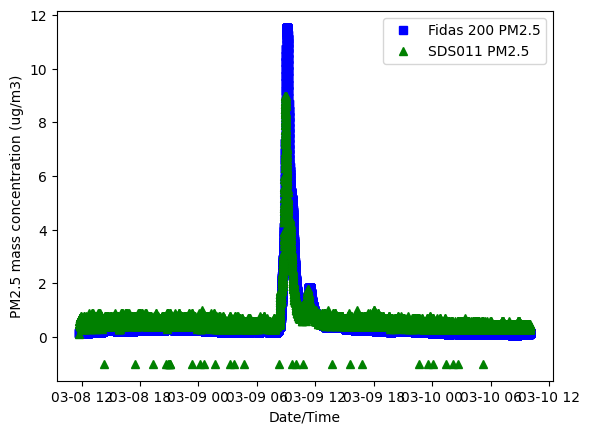

In [53]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm[' SDS011 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SDS011 PM2.5'])
plt.show()

Calculate and print RMSE

In [54]:
from sklearn.metrics import mean_squared_error 
rmsesds = mean_squared_error(df_pm['Fidas 200 PM2.5'], df_pm[' SDS011 PM2.5'], squared = False )
rmsesds

0.5666054471438976

Run moving average of sds data to try and improve data quality and plot against original data

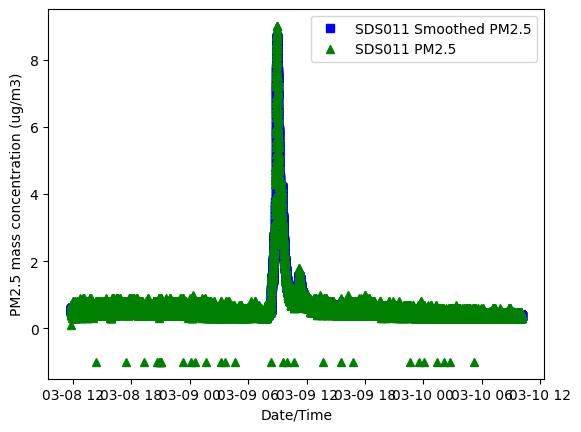

In [55]:
df_pm['SDS011 Smoothed PM2.5'] = df_pm[' SDS011 PM2.5'].rolling(30).sum()/30
plt.plot(df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'bs', df_pm['DateTime'], df_pm[' SDS011 PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['SDS011 Smoothed PM2.5', 'SDS011 PM2.5'])
plt.show()

Plot smoothed SDS011 and FIDAS readings against each other

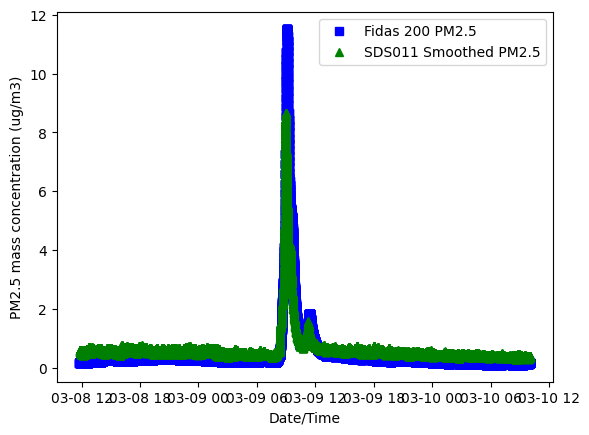

In [56]:
plt.plot(df_pm['DateTime'], df_pm['Fidas 200 PM2.5'], 'bs', df_pm['DateTime'], df_pm['SDS011 Smoothed PM2.5'], 'g^')
plt.xlabel('Date/Time')
plt.ylabel('PM2.5 mass concentration (ug/m3)')
plt.legend(['Fidas 200 PM2.5', 'SDS011 Smoothed PM2.5'])
plt.show()